# Introduction to Data Science 
# Lecture 9: Linear Regression 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll discuss:
* Simple linear regression (SLR)
* Example: advertisement effects
* Descriptive vs. inferential viewpoints 
* Multiple linear regression 
* Nonlinear relationships 

Recommended reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 3 [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)


## Linear Regression 

*Linear regression* models the relationship between an independent (explanatory) variable $X$ and a (real-valued) dependent value $Y$.

#### Examples:
<table style="width:60%">
  <tr>
    <th>explanatory variable, X</th>
    <th>dependent variable, Y</th> 
  </tr>
  <tr>
    <td>square footage</td>
    <td>house price</td> 
  </tr>
  <tr>
    <td>advertising dollars spent</td>
    <td>profit</td> 
  </tr>
  <tr>
    <td>stress</td>
    <td>lifespan</td> 
  </tr>
  <tr>
    <td>?</td>
    <td>?</td> 
  </tr>  
</table>

<br> 

#### What is wrong with this? 

<table style="width:60%">
  <tr>
    <th>explanatory variable, X</th>
    <th>dependent variable, Y</th> 
  </tr>
  <tr>
    <td> time spent studying </td>
    <td> pass/fail </td> 
  </tr>
</table>


## Simple Linear Regression (SLR)

**Data**: We have $n$ samples $(x_1, y_1), \ (x_2, y_2),\ldots,(x_n, y_n)$.

**Model**: $y \sim \beta_0 + \beta_1 x$ 

**Goal**: Find the best values of $\beta_0$ and $\beta_1$, denoted $\hat{\beta}_0$ and $\hat{\beta}_1$, so that the prediction $y = \hat{\beta}_0 + \hat{\beta}_1 x$ "best fits" the data.

<img src="438px-Linear_regression.png" width="40%" alt="https://en.wikipedia.org/wiki/Linear_regression">

**Theorem.** 
The best parameters in the *least squares sense* are:
$$
\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) }{\sum_{i=1}^n (x_i - \overline{x})^2}
\qquad \textrm{and} \qquad
\hat{\beta}_0 = \overline{y} -  \hat{\beta}_1 \overline{x}. 
$$
where $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$ and $\overline{y} = \frac{1}{n} \sum_{i=1}^n y_i$. 

**Proof.** On board in class; see SLR.pdf.


## Simple linear regression with python

### Python packages for regression
There are several different python packages that do regression:
1. [statsmodels](http://statsmodels.sourceforge.net/)
+ [scikit-learn](http://scikit-learn.org/)
+ [SciPy](http://www.scipy.org/)
+ ... 


Today, we'll look at both statsmodels and scikit-learn. One can use SciPy for linear regression, but its built-in functionality is comparatively limited. 


### Example dataset
To illustrate linear regression, we'll use the 'Advertising' dataset from
[here](http://www-bcf.usc.edu/~gareth/ISL/data.html)


For 200 different ‘markets’ (think different cities), this dataset consists of the number of sales of a particular product as well as the advertising budget for different media: TV, radio, and newspaper. 

We’ll use linear regression to study the effect of advertising on sales. 
Here, sales is the dependent variable and the budgets are the independent variables. This might help inform or evaluate an advertising strategy for this product.  

In [1]:
# imports and setup

import scipy as sc
from scipy.stats import norm

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
advert = pd.read_csv('Advertising.csv',index_col=0) #load data
advert

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


## Plot and describe the data

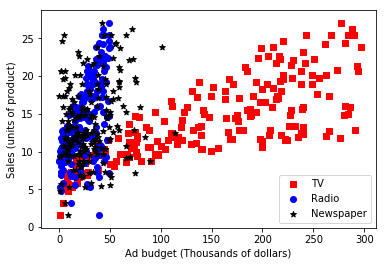

In [3]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='r',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert['Sales'],c='k',marker='*',label='Newspaper')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()

In [4]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Observations 
1. From the plot, it is clear that there is a relationship between the advertising budgets and sales. Basically, the more money spent, the larger the number of sales. 
+  The most money was spent on TV advertising. The amount for Radio and Newspaper is about the same in all markets, whereas the standard deviation for TV advertising is larger. 

## Questions
1. How can we quantify the relationship between advertising and sales? Can we predict the effect of each ad media on sales? Is the relationship linear? 
+  Which of the different ad media (TV, Radio, Newspaper) are the most effective at generating sales? 
+  Are there interactions between the different ad media?

First, let's just look at the **effect of TV advertising on sales**. We use the linear regression model
$$
Sales = \beta_0 + \beta_1 * TV.
$$

In [5]:
ad_TV_ols = sm.ols(formula="Sales ~ TV", data=advert).fit()
ad_TV_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        23:12:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

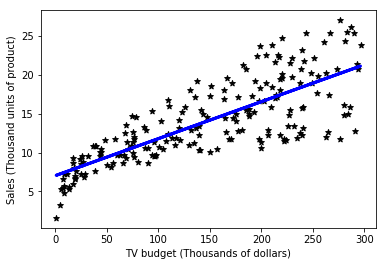

In [6]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='k',marker='*',label='TV')
plt.plot(advert['TV'],ad_TV_ols.predict(),'k',color='blue',linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## Interpretation and discussion

The intercept of the line is $\hat{\beta}_0 = 7.032$. This means that without any TV advertising, the model predicts that 7,032 units of product will be sold. 

The slope of the line is $\hat{\beta}_1 = 0.0475$. This means that the model predicts that for every additional $1k spent on TV advertising, an additional 47.5 units of product are sold. 

**So how good is this fit?** 

One way to measure the quality of the fit is to look at the sum of the squared residuals,
$$
SSR = \sum_{i=1}^n (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2. 
$$
Remember that SSR is the quantity that we minimized to find $\hat{\beta}_0$ and $\hat{\beta}_1$ in the first place (We called it $J(\beta_0,\beta_1)$.) If this number is very small, then the model fits the data very well. 


In [7]:
ad_TV_ols.ssr

2102.5305831313517

But how small is small?...good question. This number, SSR, is difficult to interpret by itself. A more easily interpretable number is the **$R^2$ value**. 

The $R^2$ value is an alternative way to measure how good of a fit the model is to the data. The benefit of the $R^2$ value over the SSR is that it is a proportion (takes values between 0 and 1) so it is easier to interpret what a *good* value is. We first define the residual sum of squares (SSR) and total sum of squares (TSS) by
$$
SSR = \sum_{i=1}^n (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2
\qquad \text{and} \qquad 
TSS = \sum_{i=1}^n (y_i - \bar y)^2. 
$$
SSR measures the amount of variability left unexplained after the linear regression. TSS measures the total variance in the data. We compute the $R^2$ value as
$$
R^2 = 1 - \frac{SSR}{TSS}.
$$
This is the proportion of the variance explained by the model. A model is good if the $R^2$ value is nearly one (the model explains all of the variance in the data). 

In our model, the value is $R^2 = 0.612$, which isn't bad. The model explains $61\%$ of the variability in sales. 

*Note*: for linear regression, the $R^2$ value is the same as correlation, but the $R^2$ value more easily generalizes to more complicated regression models than correlation, so the $R^2$ value is typically considered instead of correlation.

![image](http://imgs.xkcd.com/comics/linear_regression.png)



## Repeating the simple linear regression with scikit-learn

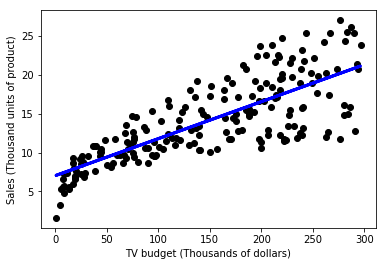

In [8]:
lr = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = advert['TV'].values.reshape(advert['TV'].shape[0],1)
y = advert['Sales'].values.reshape(advert['Sales'].shape[0],1)

lr.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## Hypothesis testing in linear regression

In lecture 4, we introduced a distrinction between descriptive statistics and statistical inference. 
1. In descriptive statistics, one seeks just to describe the data. In the present setting, we have described how the response variable linearly depends on the predictor variable by minimizing the residual sum of squares (RSS). 
+ The statistical inference way of looking at this problem would be to suppose that there exists a ground truth population with $x$ and $y$ related by 
$$
y = \beta_0 + \beta_1 x 
$$
for some unknown values of $\beta_0$ and $\beta_1$. 
Our sampled data consists of points $(x_i, y_i)$ of the form 
$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i. 
$$
Here $\varepsilon_i$ are random variable (say normally distributed) that we think of as "error" being introduced into the samples. The job of the statistician is to *infer* the values of $\beta_0$ and $\beta_1$ from the erroneous data.  

This is precisely the setting we were in when determining whether a coin was fair. There, we had a sample proportion of heads (analogous to the samples $(x_i,y_i)$ here.) We used the Central Limit Theorem to say that the variance (standard error) is given by
$$
SE(\hat \mu)^2 = \sigma^2/n 
$$
Using this value and assuming the null hypothesis (the coin is fair), we could evaluate the likelihood of obtaining a sample as extreme as the one obtained. 

In simple linear regression, we will take the null hypothesis to be
$$
H_0: \text{There is no relationship between $x$ and $y$} \iff \beta_1 = 0 
$$
with alternative
$$
H_a: \text{There is a relationship between $x$ and $y$}  \iff \beta_1 \neq 0 
$$
We assume that $\varepsilon$ is a normal random variable with zero mean and variance $\sigma^2$. Using similar ideas as above, the standard error for $\hat \beta_0$ and $\hat \beta_1$ (estimates of true parameters in this model) are computed to be 
$$
SE(\hat \beta_0)^2 = \sigma^2 \left( \frac{1}{n} + \frac{\bar x^2}{\sum_{i=1}^n (x_i - \bar x)^2} \right) 
\quad \text{and} \quad
SE(\hat \beta_1)^2 =  \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar x)^2}
$$


For this hypothesis test, the test statistic is 
$$
t = \frac{ \hat \beta_1 - 0}{SE(\hat \beta_1)},
$$
which under the assumptions of the null hypothesis, is distributed according to the $t$ distribution with $n-2$ degrees of freedom. The $p$-value is computed as the probability of observing a value as extreme as $|t|$. A small $p$-value is interpreted to mean that there is an association between the independent and dependent variables. 

### An experiment
Before we go back and discuss the $p$-values for the advertising data, let's look at some synthetic data. We generate 100 random points according the model 
$$
y = 3*x + \varepsilon,
$$
where $\varepsilon$ is normally distributed with mean zero and standard deviation 2. The best fit is found and this process is repeated 1000 times. 

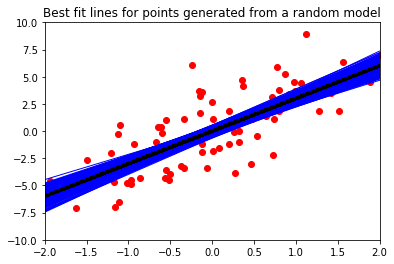

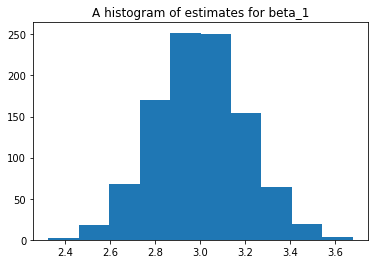

In [9]:
f= lambda x: 3*x
x = sc.linspace(-2,2,3).reshape(3,1)
plt.figure(0)

sample_size = 100
betaOnes = []
for ii in range(1000):
    xp = norm.rvs(size=sample_size)
    yp = f(xp)+norm.rvs(size=sample_size,scale=2)
    
    if ii is 1: plt.plot(xp,yp,'ro')        

    lr = linear_model.LinearRegression()
    lr.fit(X=xp.reshape(100,1), y=yp)
    plt.plot(x,lr.predict(x),color='blue',linewidth=1)
    
    # Collect the slopes 
    betaOnes.append(lr.coef_[0])

plt.plot(xp,f(xp),'k',linewidth=3)
plt.xlim(-2,2)    
plt.ylim(-10,10)    
plt.title('Best fit lines for points generated from a random model')
plt.show()

plt.figure(1)
plt.hist(betaOnes)
plt.title('A histogram of estimates for beta_1')
plt.show()


Now, let's return to the linear regression model of sales on TV advertising, 
$$
Sales = \beta_0 + \beta_1 * TV.
$$
Looking at the statsmodels output, we see that the $p$-values for both the intercept and the slope are very small. The probability of seeing obtaining these values is nearly zero, assuming $H_0$ is true. So, we reject the null hypothesis and say there is an association between TV advertising (independent variable) and sales (dependent variable). 


## Other advertisement methods?  
Recall that we not only know the ad budget for TV, but also Radio and Newspaper. 

Next, let's repeat the linear regression analysis for the other types of advertisements using statsmodels. 

In [10]:
ad_Radio_ols = sm.ols(formula="Sales ~ Radio", data=advert).fit()
ad_Radio_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        23:12:05   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
ad_Newspaper_ols = sm.ols(formula="Sales ~ Newspaper", data=advert).fit()
ad_Newspaper_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 04 Feb 2019   Prob (F-statistic):            0.00115
Time:                        23:12:05   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

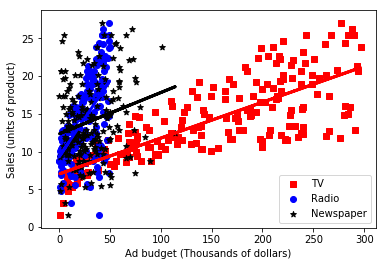

In [12]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='r',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert['Sales'],c='k',marker='*',label='Newspaper')
plt.legend(numpoints=1,loc=4)

plt.plot(advert['TV'],ad_TV_ols.predict(),c='r',linewidth=3)
plt.plot(advert['Radio'],ad_Radio_ols.predict(),c='b',linewidth=3)
plt.plot(advert['Newspaper'],ad_Newspaper_ols.predict(),c='k',linewidth=3)

plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()


## Interpretation

*So what is the most effective advertising media?*

The slope for radio is largest, so you might argue that this is the most effective advertising media. For every additional \$1k spent on Radio advertising, an additional 202 units of product are sold. (Compare to 54.7 for newspaper and 47.5 for TV.)

On the other hand, the $R^2$ value for radio is just $33\%$. So the model isn't explaining as much of the data as the model for TV advertising ($R^2 = 61\%$), but is explaining more than the model for newspaper advertising ($R^2 = 5\%$). 

The main problem with the approach here is that for each advertising media we look at, we're ignoring the ads in the other media. For example, in the model for TV advertising, 
$$
Sales = \beta_0 + \beta_1 * TV,
$$
we're ignoring both Radio and Newspaper advertising. 

We need to take all three into account at once. Maybe we can construct a model that looks like 
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2*Radio + \beta_3*Newspaper. 
$$
This is the idea behind Multiple Linear Regression. 

## Multiple Linear Regression

**Model:**
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2*Radio + \beta_3*Newspaper. 
$$


In [13]:
ad_all_ols = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=advert).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        23:12:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

Spending an additional \$1,000  on radio advertising results in an increase in sales by 189 units. Radio is the most effective at method of advertising. 

In multilinear regression, the F-test is a way to test the null hypothesis,
$$
H_0 = \textrm{all coefficients are zero.}
$$
In this case, we see that the $p$-value for the $F$-statistic is vanishingly small - indicating that our model is significant. 

Now let's consider the individual coefficients in the model and their $p$-values. Note that the coefficients for TV and Radio are approximately the same as for simple linear regression. The coefficient for Newspaper changed significantly. Furthermore, note that the $p$-value is now very large $p=0.86$. There is not sufficient evidence to reject the null hypothesis that the Newspaper and Sales variables have no relationship. 

So then why did the simple linear regression give that there is a relationship between Newspaper and Sales Variables? 
*Newspaper is actually a confounder!* (Remember the example where temperature is a confounder for pool deaths and ice creams sales.) Let's look at the correlations between the four variables. Recall that correlation between two variables is given by 
$$
r_{x,y} = \frac{ \frac{1}{n}\sum_{i=1}^n (x_i - \bar x) (y_i - \bar y)}{s_x s_y}.
$$
Correlation is a number between −1 to +1 and measures how much the two variables vary together. 

Plotted below is also a scatter plot matrix, which is a good way of visualizing the correlations. 

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


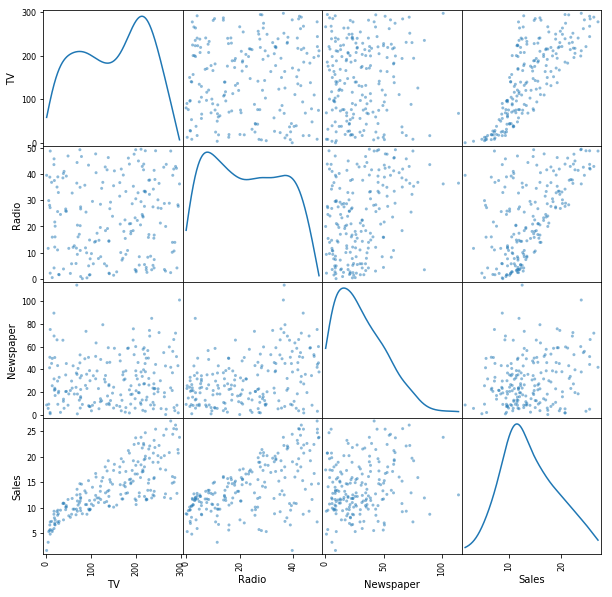

In [14]:
print(advert.corr())
pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='kde')
plt.show()

The correlation between Newspaper and Radio is 0.35, which implies that in markets where the company advertised using Radio, they also advertised using newspaper. Thus, the influence of Radio on Sales can be incorrectly attributed to Newspaper advertisements! 

This leads us to the following linear regression model, where we forget about Newspaper advertisements:
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} 
$$


In [15]:
ad_TR_ols = sm.ols(formula="Sales ~ TV + Radio", data=advert).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 04 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        23:12:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model performs pretty well. It accounts for $R^2 = 90\%$ of the variance in the data. 

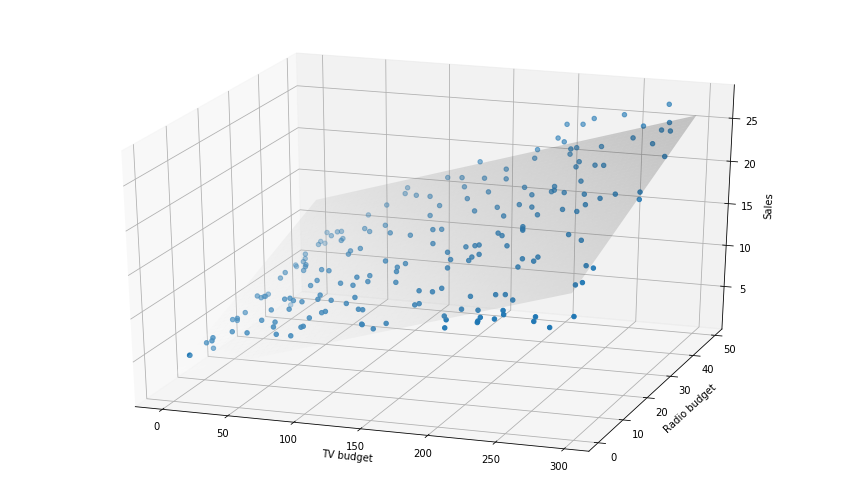

In [16]:
plt.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = sc.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = sc.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = sc.meshgrid(x,y)
par = dict(ad_TR_ols.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y 
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

## Nonlinear relationships

We can consider the interaction between TV and Radio advertising in the model, by taking 
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} + \beta_3 \text{TV_budget} *\text{Radio_budget}. 
$$
The rational behind the last term is that perhaps spending $x$ on television advertising and $y$ on radio advertising leads to more sales than simply $x+y$. In marketing this is known as the *synergy effect* and in statistics it is known as the *interaction effect*.

**Note**: even though the relationship between the independent and dependent variables is nonlinear, the model is still linear. 

In [17]:
ad_NL = sm.ols(formula="Sales ~ TV + Radio + TV*Radio", data=advert).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 04 Feb 2019   Prob (F-statistic):          6.68e-146
Time:                        23:12:07   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is really excellent. All of the $p$-values are small and $R^2 = 97\%$ of the variability in the data is accounted for by the model. 

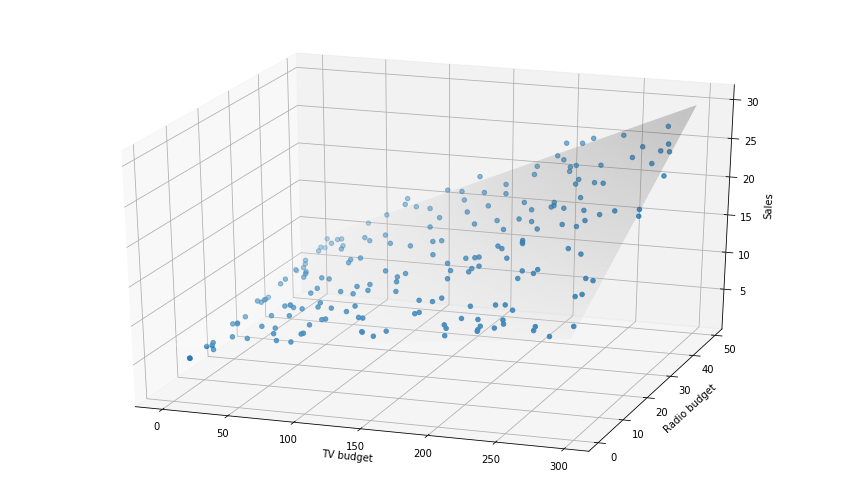

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = sc.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = sc.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = sc.meshgrid(x,y)
par = dict(ad_NL.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y + par["TV:Radio"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

## A word of caution on overfitting (more on this later)

It is tempting to include a lot of terms in the regression, but this is problematic. A useful model will  *generalize* beyond the data given to it. 

![image](http://imgs.xkcd.com/comics/curve_fitting_2x.png)
